In [1]:
import pandas as pd
import cv2 as cv


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import pathlib


/tmp/ipykernel_3610/2665206519.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-27 18:21:13.082043: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 18:21:13.296720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 18:21:13.296824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin 

In [2]:
dataset_dir_train = pathlib.Path("Potato_Dataset/Train")
dataset_dir_test = pathlib.Path("Potato_Dataset/Test")
dataset_dir_valid = pathlib.Path("Potato_Dataset/Valid")
dataset_dir_test

PosixPath('Potato_Dataset/Test')

In [3]:
dataset_label = {
    "Potato Early Blight" : 0,
    "Potato Late Blight" : 1,
    "Healthy" : 2
}

In [5]:
dataset_dictionary_train = {

    "Potato Early Blight" : list(dataset_dir_train.glob("Potato___Early_blight/*")),
    "Potato Late Blight" : list(dataset_dir_train.glob("Potato___Late_blight/*")),
    "Healthy" : list(dataset_dir_train.glob("Potato___healthy/*"))
    
}

In [7]:
dataset_dictionary_train["Potato Early Blight"]

[PosixPath('Potato_Dataset/Train/Potato___Early_blight/db60c4cf-30f1-460c-a345-3045f192f725___RS_Early.B 6722.JPG'),
 PosixPath('Potato_Dataset/Train/Potato___Early_blight/f7a5e3e3-796e-4f4a-943c-24d26e2591d4___RS_Early.B 8679.JPG'),
 PosixPath('Potato_Dataset/Train/Potato___Early_blight/c5cb3e89-f00f-4032-80ca-eb39bead0796___RS_Early.B 8645.JPG'),
 PosixPath('Potato_Dataset/Train/Potato___Early_blight/dcc46f93-d842-496d-980b-4b29a00551d5___RS_Early.B 8424.JPG'),
 PosixPath('Potato_Dataset/Train/Potato___Early_blight/daa35c03-7307-4e2e-8b15-f33bfff5a12d___RS_Early.B 7712.JPG'),
 PosixPath('Potato_Dataset/Train/Potato___Early_blight/e57ca76e-a4c3-40f2-a673-9f48b3b357ae___RS_Early.B 7539.JPG'),
 PosixPath('Potato_Dataset/Train/Potato___Early_blight/da4c4f0f-ea7b-489a-8ac1-f8c63ff59bc4___RS_Early.B 8818.JPG'),
 PosixPath('Potato_Dataset/Train/Potato___Early_blight/d286d101-227f-48ba-b906-586879eb6a00___RS_Early.B 7095.JPG'),
 PosixPath('Potato_Dataset/Train/Potato___Early_blight/dd875158-

In [6]:
dataset_dictionary_valid = {

    "Potato Early Blight" : list(dataset_dir_valid.glob("Potato___Early_blight/*")),
    "Potato Late Blight" : list(dataset_dir_valid.glob("Potato___Late_blight/*")),
    "Healthy" : list(dataset_dir_valid.glob("Potato___healthy/*"))
    
}

In [8]:
dataset_dictionary_test = {

    "Potato Early Blight" : list(dataset_dir_test.glob("Potato___Early_blight/*")),
    "Potato Late Blight" : list(dataset_dir_test.glob("Potato___Late_blight/*")),
    "Healthy" : list(dataset_dir_test.glob("Potato___healthy/*"))
    
}

In [10]:
X_train = []
y_train = []
X_train_names = []

for label, images in dataset_dictionary_train.items():
    for image in images:
        img = cv.imread(str(image))
        X_train.append(img)
        X_train_names.append(str(image))
        y_train.append(dataset_label[label])
        

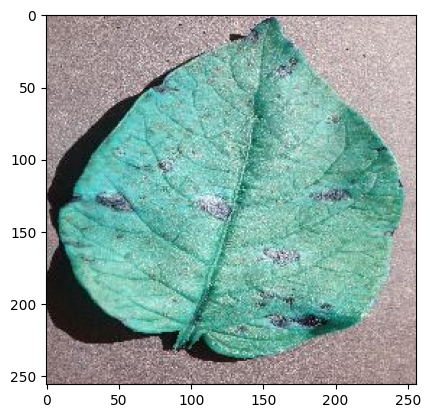

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [12]:
X_test = []
y_test = []
X_test_names = []

for label, images in dataset_dictionary_test.items():
    for image in images:
        img = cv.imread(str(image))
        X_test.append(img)
        X_test_names.append(str(image))
        y_test.append(dataset_label[label])

In [13]:
X_valid = []
y_valid = []
X_valid_names = []

for label, images in dataset_dictionary_valid.items():
    for image in images:
        img = cv.imread(str(image))
        X_valid.append(img)
        X_valid_names.append(str(image))
        y_valid.append(dataset_label[label])
        

In [14]:
X_test[0].shape

(256, 256, 3)

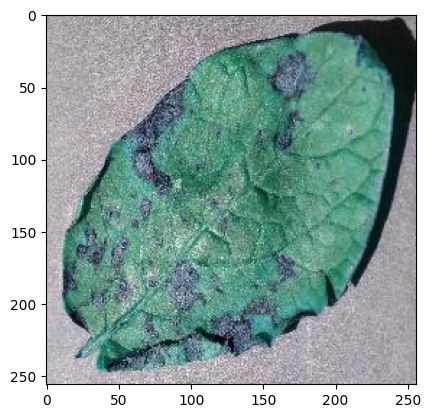

In [15]:
plt.imshow(X_test[0])

In [23]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [24]:
for layer in base_model.layers:
    layer.trainable = True

In [25]:
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())  
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 23850371 (90.98 MB)
Trainable params: 23797251 (90.78 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [29]:
X_train[0].shape

(256, 256, 3)

In [30]:
import numpy as np
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_valid_np = np.array(X_valid)
y_valid_np = np.array(y_valid)

In [32]:
history = model.fit(
    X_train_np,y_train_np,
    epochs=50,
    validation_data = (X_valid_np,y_valid_np)
)

Epoch 1/50
29/29 [==============================] - 251s 9s/step - loss: 0.2035 - accuracy: 0.9467 - val_loss: 30306.3203 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 247s 9s/step - loss: 0.1293 - accuracy: 0.9633 - val_loss: 140.2012 - val_accuracy: 0.4433
Epoch 3/50
29/29 [==============================] - 248s 9s/step - loss: 0.1776 - accuracy: 0.9378 - val_loss: 1332.1864 - val_accuracy: 0.3333
Epoch 4/50
29/29 [==============================] - 249s 9s/step - loss: 0.1525 - accuracy: 0.9556 - val_loss: 6421.5337 - val_accuracy: 0.3333
Epoch 5/50
29/29 [==============================] - 251s 9s/step - loss: 0.1273 - accuracy: 0.9533 - val_loss: 130.7749 - val_accuracy: 0.4467
Epoch 6/50
29/29 [==============================] - 244s 8s/step - loss: 0.0453 - accuracy: 0.9833 - val_loss: 18.7697 - val_accuracy: 0.3667
Epoch 7/50
29/29 [==============================] - 244s 8s/step - loss: 0.0571 - accuracy: 0.9811 - val_loss: 2.4769 - val_accuracy: 0.733

In [33]:
x_test_np = np.array(X_test)
y_test_np = np.array(y_test)

In [34]:
model.evaluate(x_test_np,y_test_np)

10/10 [==============================] - 18s 2s/step - loss: 10.3676 - accuracy: 0.4000


[10.367562294006348, 0.4000000059604645]

In [36]:
model.predict(x_test_np)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[8.01732779e-01, 1.98267207e-01],
       [8.27945322e-02, 9.17205453e-01],
       [4.40131761e-02, 9.55986798e-01],
       [1.91979587e-01, 8.08020413e-01],
       [6.45515374e-09, 1.00000000e+00],
       [2.76016436e-07, 9.99999762e-01],
       [8.01816952e-07, 9.99999166e-01],
       [4.52813911e-05, 9.99954700e-01],
       [4.07473344e-09, 1.00000000e+00],
       [2.41220482e-06, 9.99997616e-01],
       [5.75845434e-07, 9.99999404e-01],
       [1.24709072e-06, 9.99998808e-01],
       [5.28774717e-06, 9.99994755e-01],
       [1.10350115e-07, 9.99999881e-01],
       [9.58244755e-08, 9.99999881e-01],
       [9.99999285e-01, 7.20102776e-07],
       [9.99275744e-01, 7.24262442e-04],
       [9.90331888e-01, 9.66810714e-03],
       [9.99950409e-01, 4.95839995e-05],
       [9.99999881e-01, 9.23632584e-08],
       [9.96308088e-01, 3.69193032e-03],
       [9.99964237e-01, 3.57620847e-05],
       [9.99959707e-01, 4.03099657e-05]], dtype=float32)

In [49]:
def predict(n):
    predict=model.predict(np.expand_dims(x_test_np[n], axis=0))
    label=np.argmax(predict)
    # Value=dataset_label[label]
    if label==1:
        print("Arecanut")
    else:
        print("Not arecanut")

In [65]:
len(x_test)

23

In [74]:
predict(8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Arecanut


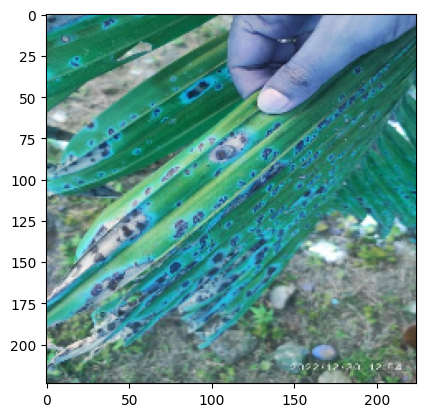

In [75]:
plt.imshow(x_test[8])